In [30]:

import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay


In [31]:
data = pd.read_csv('./Dataset/train.csv')
data

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


### Data Understanding

In [32]:
train_dataset = pd.read_csv("./Dataset/Train.csv")

print('The columns of training data:')
print(train_dataset.columns)

print('\nThe shape of the training data is:')
print(train_dataset.shape )

print('\nThe sample of training data:')
train_dataset.head()

The columns of training data:
Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

The shape of the training data is:
(8068, 11)

The sample of training data:


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [33]:
sample_submission_dataset = pd.read_csv("./Dataset/sample_submission.csv")
#sample_submission_dataset.head()
print('The shape of the sample_submission_dataset is:')
print(sample_submission_dataset.shape )
print('\nThe columns of the sample_submission_dataset are:')
print(sample_submission_dataset.columns)

The shape of the sample_submission_dataset is:
(2627, 2)

The columns of the sample_submission_dataset are:
Index(['ID', 'Segmentation'], dtype='object')


In [34]:
test_dataset = pd.read_csv("./Dataset/Test.csv")
#test_dataset.head()
print(test_dataset.shape)
print(test_dataset.columns)

(2627, 10)
Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1'],
      dtype='object')


In [35]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [36]:
train_dataset1 = train_dataset.drop('ID', axis=1)
#train_dataset1.columns

### Feature Engineering

In [37]:
train_dataset1.isnull().sum()

Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [38]:
#conditional imputation
#if the person has ever_married as 'No' then set the Family_Size as 1

train_dataset1.loc[
    (train_dataset1['Ever_Married'] =='No') &
    (train_dataset1['Family_Size'].isnull()), 'Family_Size'
] = 1.0

#then remove the rest of the rows with the Family_Size & Ever_Married as Null.

train_dataset1 = train_dataset1.dropna(subset =['Family_Size', 'Ever_Married'])

In [39]:
train_dataset1.isnull().sum()

Gender               0
Ever_Married         0
Age                  0
Graduated           69
Profession         116
Work_Experience    773
Spending_Score       0
Family_Size          0
Var_1               67
Segmentation         0
dtype: int64

In [40]:
##If Profession is known / not null, then populate the Graduate as 'Yes'.

train_dataset1.loc[
    (train_dataset1['Profession'].notnull()) &
    (train_dataset1['Graduated'].isnull()), 'Graduated'
] = 'Yes'

#remove the rest of rows with Profession & Graduated as null.
train_dataset1= train_dataset1.dropna(subset=['Profession','Graduated'])

In [41]:
train_dataset1.isnull().sum()

Gender               0
Ever_Married         0
Age                  0
Graduated            0
Profession           0
Work_Experience    751
Spending_Score       0
Family_Size          0
Var_1               64
Segmentation         0
dtype: int64

In [42]:
train_dataset1=train_dataset1.dropna(subset=['Work_Experience', 'Var_1'])
train_dataset1.isnull().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [43]:
print('The shape of the dataset after removing the null value is' , train_dataset1.shape)

The shape of the dataset after removing the null value is (6864, 10)


In [44]:
train_dataset1 = shuffle(train_dataset1)
train_dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6864 entries, 2905 to 2046
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           6864 non-null   object 
 1   Ever_Married     6864 non-null   object 
 2   Age              6864 non-null   int64  
 3   Graduated        6864 non-null   object 
 4   Profession       6864 non-null   object 
 5   Work_Experience  6864 non-null   float64
 6   Spending_Score   6864 non-null   object 
 7   Family_Size      6864 non-null   float64
 8   Var_1            6864 non-null   object 
 9   Segmentation     6864 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 589.9+ KB


Segmentation
D    1861
C    1739
A    1674
B    1590
Name: count, dtype: int64


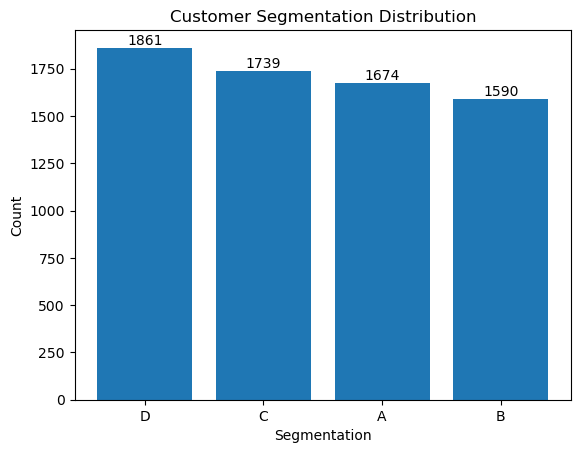

In [45]:
seg_counts = train_dataset1['Segmentation'].value_counts()

plt.figure()
plt.bar(seg_counts.index, seg_counts.values)
plt.xlabel("Segmentation")
plt.ylabel("Count")
plt.title("Customer Segmentation Distribution")

for i, v in enumerate(seg_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

print(train_dataset1['Segmentation'].value_counts()) #segmentation in the dataset

plt.show()

In [46]:
#continuous column statistics 
train_dataset1.select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,6864.0,43.344551,16.530890,18.0,30.0,40.0,53.0,89.0
Work_Experience,6864.0,2.648164,3.414562,0.0,0.0,1.0,4.0,14.0
Family_Size,6864.0,2.803030,1.534664,1.0,2.0,2.0,4.0,9.0


In [47]:
#categorical column statistics
train_dataset1.select_dtypes('object').describe().transpose()

,count,unique,top,freq
Gender,6864,2,Male,3765
Ever_Married,6864,2,Yes,3971
Graduated,6864,2,Yes,4379
Profession,6864,9,Artist,2230
Spending_Score,6864,3,Low,4182
Var_1,6864,7,Cat_6,4582
Segmentation,6864,4,D,1861


### EDA

In [48]:
###which features are strongly related to customer segmentation?

categorical_columns = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']

eda_df = pd.concat([
    train_dataset1.select_dtypes('number'), #keeps only numeric columns
    pd.get_dummies(train_dataset1[categorical_columns], drop_first=True), #one-hot encoding for categorical columns
    train_dataset1['Segmentation'].map({'A':0, 'B':1, 'C':2, 'D':3}) # target value encoding
], axis=1) #joins encoded columns side by side #every row has numeric, categorical and target

corr_segmentation = eda_df.corr()['Segmentation'].sort_values()[:-1]
corr_segmentation #corr range from -1 to +1

Age                        -0.239066
Ever_Married_Yes           -0.210113
Graduated_Yes              -0.175680
Profession_Entertainment   -0.119373
Profession_Engineer        -0.091751
Profession_Lawyer          -0.069489
Spending_Score_High        -0.068687
Var_1_Cat_6                -0.013949
Profession_Executive       -0.010999
Profession_Doctor          -0.009552
Var_1_Cat_3                -0.006490
Var_1_Cat_4                -0.002971
Var_1_Cat_7                 0.005034
Work_Experience             0.007679
Var_1_Cat_5                 0.007752
Profession_Homemaker        0.010086
Var_1_Cat_2                 0.027066
Gender_Male                 0.029731
Profession_Marketing        0.087567
Spending_Score_Low          0.101903
Family_Size                 0.184965
Profession_Healthcare       0.373357
Name: Segmentation, dtype: float64

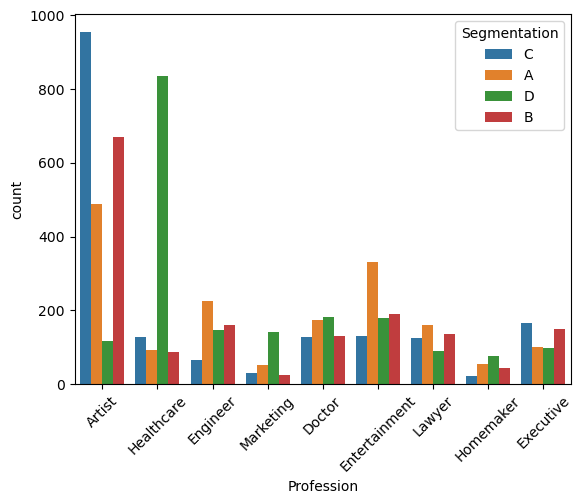

In [49]:
# Distribution of Profession with respect to Segmentation

sns.countplot(train_dataset1, x='Profession', hue= 'Segmentation')
plt.xticks(rotation=45)
plt.show()

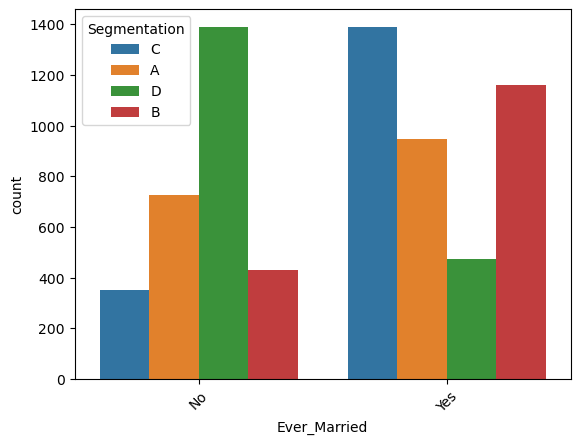

In [50]:
#Distribution of Ever_Married with respect to Segmentation

sns.countplot(train_dataset1, x='Ever_Married', hue='Segmentation')
plt.xticks(rotation=45)
plt.show()

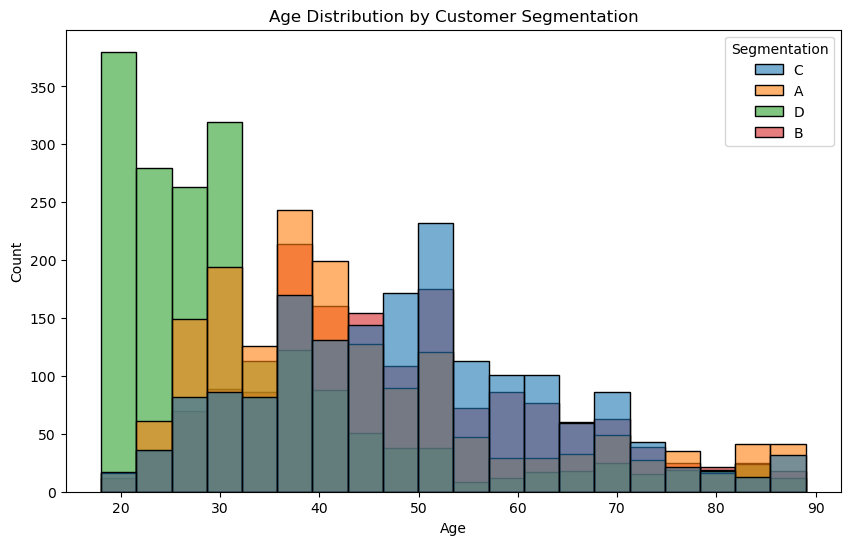

In [51]:
plt.figure(figsize=(10,6))

sns.histplot(
    data=train_dataset1,
    x='Age',
    hue='Segmentation',
    bins=20,          
    multiple='layer', # overlay
    alpha=0.6
)

plt.title('Age Distribution by Customer Segmentation')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

##likely the case that older customers fall into segment A and younger customers into segment D working professionals
#between32 -42 falls under segment A and then comes the widespreas including higher age from 70-90 falls under segment B (likely broad or premium segment))

## Training or evaluation


In [52]:
y = train_dataset1['Segmentation'].map({'A':0, 'B':1, 'C':2, 'D':3}) #target
X = pd.get_dummies(train_dataset1.drop('Segmentation', axis =1), drop_first=True) #features

In [53]:
X_train,X_val,y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=102) #train-test split

print('The shape of X_train:', X_train.shape)
print('The shape of y_train:', y_train.shape)
print('The shape of X_val:', X_val.shape)
print('The shape of y_val:', y_val.shape)

The shape of X_train: (5491, 22)
The shape of y_train: (5491,)
The shape of X_val: (1373, 22)
The shape of y_val: (1373,)


In [54]:
#define a function to report performance metrics
def report(model):
    y_pred = model.predict(X_val)
    print(classification_report(y_val, y_pred, target_names=['A', 'B', 'C', 'D'])) #to make output human readable
    ConfusionMatrixDisplay.from_predictions(y_val,y_pred, display_labels=['A', 'B', 'C', 'D'])

              precision    recall  f1-score   support

           A       0.43      0.37      0.40       339
           B       0.33      0.38      0.35       314
           C       0.56      0.57      0.56       352
           D       0.65      0.63      0.64       368

    accuracy                           0.49      1373
   macro avg       0.49      0.49      0.49      1373
weighted avg       0.50      0.49      0.50      1373



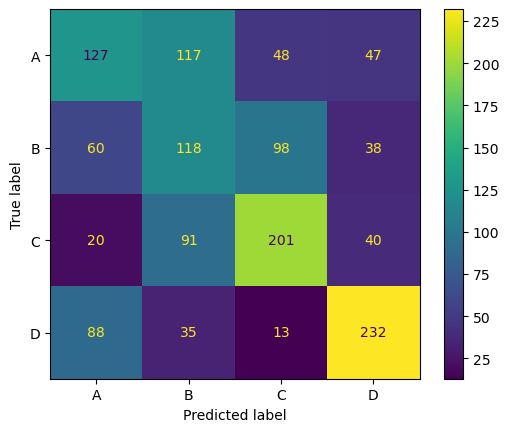

In [55]:
#Decision Tree classiifer

params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [4,6,7,8,9,10],
    'min_samples_split' : [2,5,10,20,30,40,50]
}
DecisionTreeClassifier_model = GridSearchCV(
    DecisionTreeClassifier(), param_grid = params, cv =5
)
DecisionTreeClassifier_model.fit(X_train,y_train)
report(DecisionTreeClassifier_model)

              precision    recall  f1-score   support

           A       0.50      0.52      0.51       339
           B       0.43      0.26      0.33       314
           C       0.53      0.68      0.59       352
           D       0.65      0.66      0.65       368

    accuracy                           0.54      1373
   macro avg       0.53      0.53      0.52      1373
weighted avg       0.53      0.54      0.53      1373



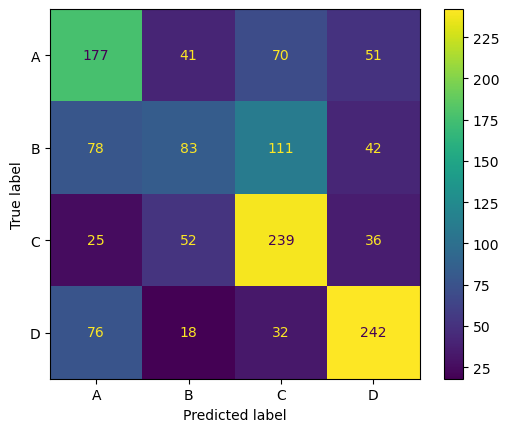

In [56]:
# AdaBoostClassifier
params = {'n_estimators': [25, 50, 75, 100]}
ada_boost = GridSearchCV(AdaBoostClassifier(), param_grid=params, cv=5)
ada_boost.fit(X_train, y_train)
report(ada_boost)

              precision    recall  f1-score   support

           A       0.48      0.49      0.48       339
           B       0.37      0.33      0.35       314
           C       0.60      0.58      0.59       352
           D       0.61      0.69      0.65       368

    accuracy                           0.53      1373
   macro avg       0.52      0.52      0.52      1373
weighted avg       0.52      0.53      0.52      1373



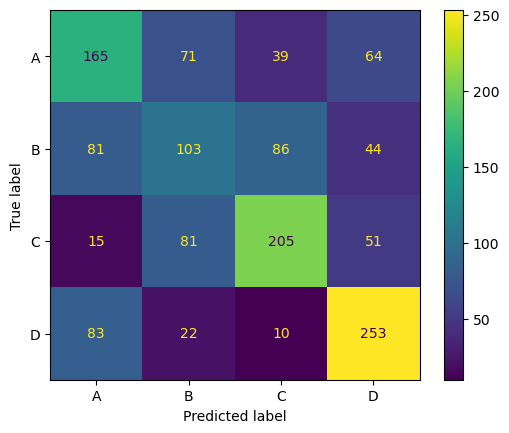

In [57]:
# RandomForestClassifier
params = {
          'criterion': ['gini', 'entropy'], 
          'n_estimators': [25, 50, 75, 100, 125], 
          'min_samples_split': [20, 30, 40, 50]
          }
random_forest = GridSearchCV(RandomForestClassifier(), param_grid=params, cv=5)
random_forest.fit(X_train, y_train)
report(random_forest)

In [58]:
print(random_forest.best_params_) #best parameters selected from random forest

{'criterion': 'entropy', 'min_samples_split': 50, 'n_estimators': 125}


In [59]:
random_forest_classifier = RandomForestClassifier(
    criterion='gini', 
    min_samples_split=40, 
    n_estimators=125
    )
random_forest_classifier.fit(X, y)

RandomForestClassifier(min_samples_split=40, n_estimators=125)

## Performance on Test dataset

In [60]:
test_dataset

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6
...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4
